In [1]:
import csv
import cv2
import numpy as np
import os
import sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [2]:
lines = []
with open('./data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)

In [3]:
images = []
measurements = []
for line in lines:
    source_path = line[0]
    filename = source_path.split('/')[-1]
    current_path = './data/IMG/' + filename
    image = cv2.imread(current_path)
    images.append(image)
    measurement = float(line[3])
    measurements.append(measurement)

In [4]:
augmented_images, augmented_measurements = [], []
for image, measurement in zip(images, measurements):
    augmented_images.append(image)
    augmented_measurements.append(measurement)
    augmented_images.append(cv2.flip(image, 1))
    augmented_measurements.append(measurement*-1.0)

In [5]:
X_train = np.array(augmented_images)
y_train = np.array(augmented_measurements)

In [6]:
X_train.shape

(16072, 160, 320, 3)

### Model Architecture and Training Strategy

In [7]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Dropout, Activation, Cropping2D, BatchNormalization
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

Using TensorFlow backend.


In [8]:
model = Sequential()
BatchNormalization()
model.add(Lambda(lambda x: x/255.0 - 0.5, input_shape=(160,320,3), output_shape=(160,320,3)))
model.add(Cropping2D(cropping=((70, 25), (0, 0))))
model.add(Convolution2D(24, 5, 5, subsample=(2, 2), activation="relu"))
model.add(Convolution2D(36, 5, 5, subsample=(2, 2), activation="relu"))
model.add(Convolution2D(48, 5, 5, subsample=(2, 2), activation="relu"))
model.add(Convolution2D(64, 3, 3, activation="relu"))
model.add(Convolution2D(64, 3, 3, activation="relu"))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))

In [9]:
model.compile(loss='mse', optimizer='adam')
model.fit(X_train, y_train, validation_split=0.2, shuffle=True, nb_epoch=3)
model.save('model.h5')

Train on 12857 samples, validate on 3215 samples
Epoch 1/3
12857/12857 [==============================] - 421s - loss: 0.0116 - val_loss: 0.0100

### Solution Design

In [9]:
#First, i was just thinking how to get it worked. So i just chosed the simplist network
#It works but it doesn't perform well. I tried to increase its performance by using
#more advanced network structure, LeNet like arcitecture. It introduced a disadvantage,
#which is it takes me a lot of time to training on local machine. In order to increase
#speed, i reduce epoch that needs to be trained.

### Architecture Explaination

  Layer            | Description
  -----------------|----------------  
  Input            | 160x320x3 image
  Convolution 5x5  | valid padding
  RELU             | 
  Max pooling      | 2x2 stride
  Dropout          | 0.5
  Convolution 5x5  | valid padding
  RELU             | 
  Max pooling      | valid padding
  Dropout          | 0.5
  Fully connected  | 120 outputs
  Fully connected  | 1 ouput

### Dataset Visualizations

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
%matplotlib inline

In [8]:
check_file = './data/driving_log.csv'

In [9]:
need_check = pd.read_csv(check_file)

In [10]:
need_check.head()

,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0,0.1,0.2,22.14829
0,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
1,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
2,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
3,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236
4,IMG/center_2016_12_01_13_31_13_279.jpg,IMG/left_2016_12_01_13_31_13_279.jpg,IMG/right_2016_12_01_13_31_13_279.jpg,0.0,0.0,0.0,1.403993


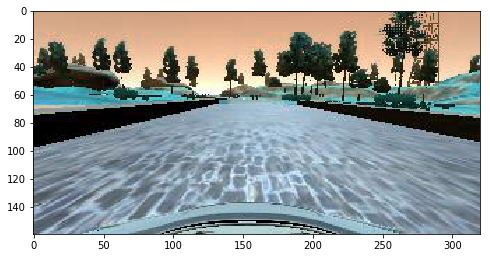

In [13]:
#index = random.randint(0, len(images))
image = images[0].squeeze()

plt.figure(figsize=(8,8))
plt.imshow(image, cmap="gray")